In [1]:
import pandas as pd 
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(os.getcwd())

C:\Users\AB034IB\ds


In [4]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
df_train = pd.read_csv("data/titanic_train.csv")

 ## EDA

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
sns.set_style('whitegrid')

<Axes: >

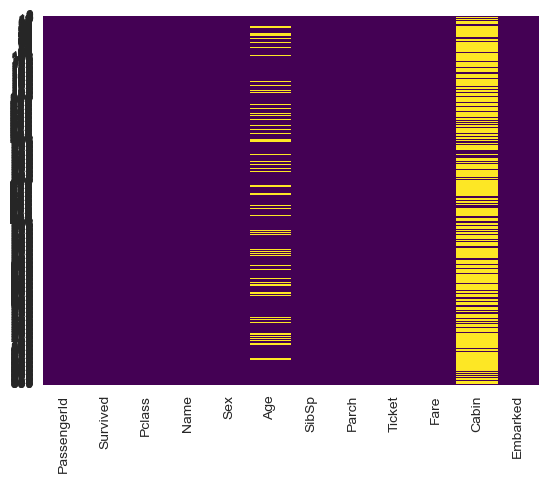

In [8]:
#df_train.isnull()
sns.heatmap(df_train.isnull(), yticklabels=True, cbar=False, cmap='viridis')

In [9]:
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})
missing_value_df

# 20% ofage missing
# 77% of cabin missing

,column_name,percent_missing
PassengerId,PassengerId,0.000000
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
Age,Age,19.865320
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000
Fare,Fare,0.000000


<Axes: xlabel='Survived', ylabel='count'>

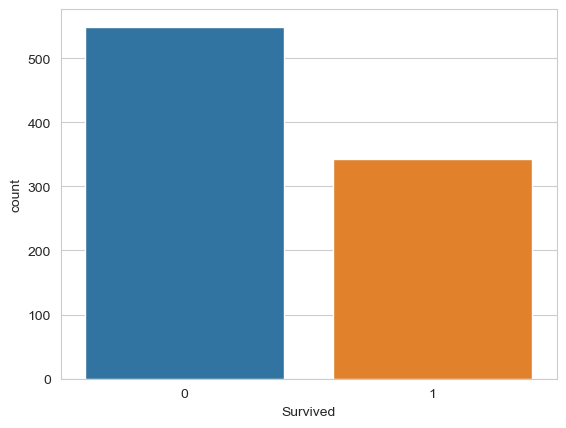

In [10]:
sns.countplot(x="Survived", data=df_train)

<Axes: xlabel='Survived', ylabel='count'>

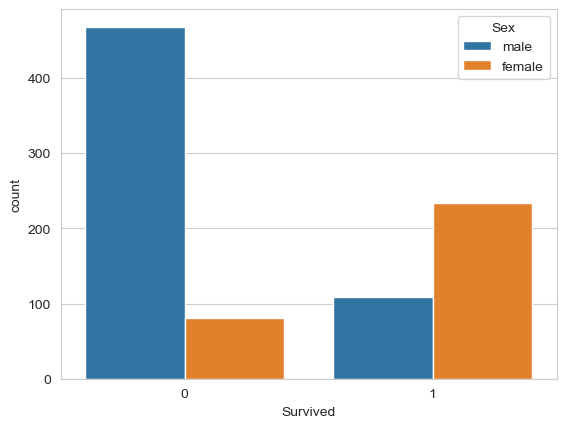

In [11]:
sns.countplot(x="Survived", hue="Sex", data=df_train)

<Axes: xlabel='Survived', ylabel='count'>

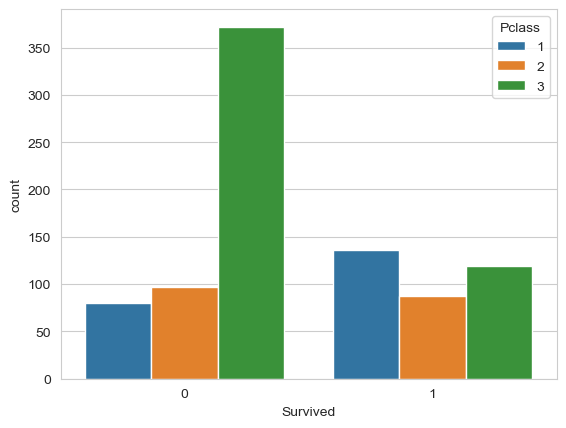

In [12]:
sns.countplot(x="Survived", hue="Pclass", data=df_train)

C:\Users\AB034IB\AppData\Local\Temp\ipykernel_27304\3349911779.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Age'].dropna(), kde=False, bins=20)


<Axes: xlabel='Age'>

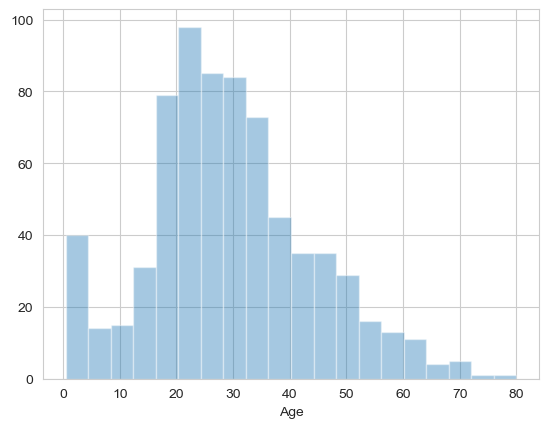

In [13]:
sns.distplot(df_train['Age'].dropna(), kde=False, bins=20)

C:\Users\AB034IB\AppData\Local\Temp\ipykernel_27304\127452637.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Fare'], kde=False)


<Axes: xlabel='Fare'>

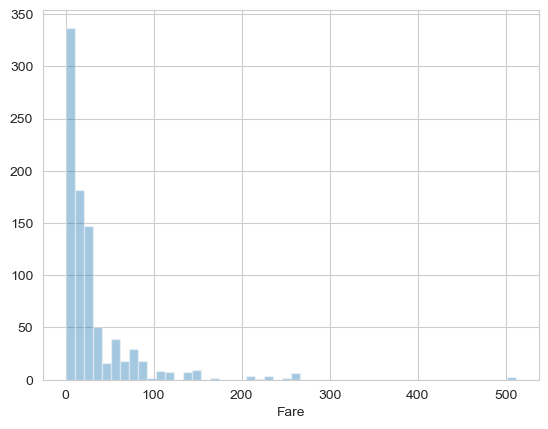

In [14]:
sns.distplot(df_train['Fare'], kde=False)

<Axes: xlabel='Pclass', ylabel='Age'>

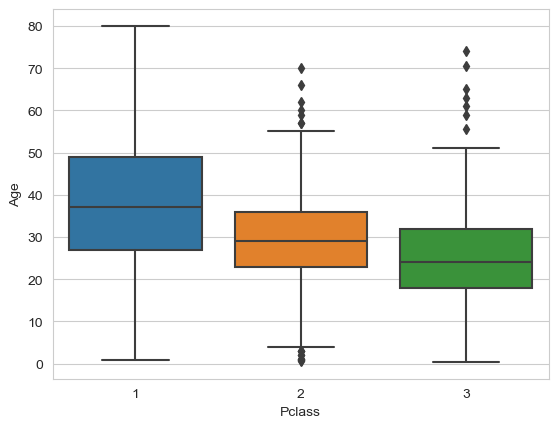

In [15]:
sns.boxplot(x='Pclass', y='Age', data=df_train)

In [16]:
df_train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [20]:
first_mean = df_train.loc[df_train['Pclass'] == 1, 'Age'].mean()

second_mean = df_train.loc[df_train['Pclass'] == 2, 'Age'].mean()
second_mean
third_mean = df_train.loc[df_train['Pclass'] == 3, 'Age'].mean()
print(first_mean,second_mean, third_mean)


38.233440860215055 29.87763005780347 25.14061971830986


In [24]:
# fill nulls with mean of each class belongs
def fill_nulls(cols):
    Pclass= cols[1]
    Age = cols[0]
    if pd.isnull(Age):
        if Pclass == 1:  
            return 38
        elif Pclass==2:        
            return 30
        else:  
            return 25
    else:
        return Age


In [26]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(fill_nulls, axis=1)

<Axes: >

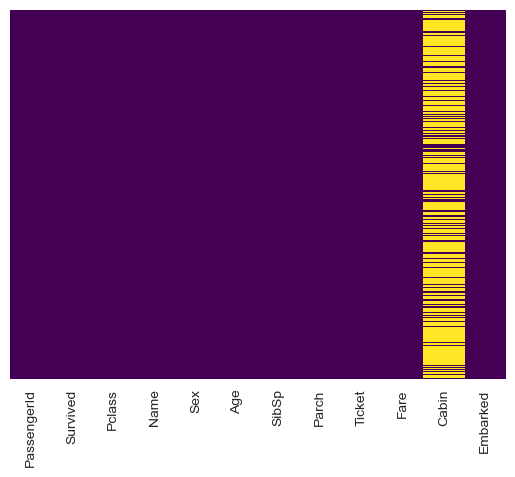

In [30]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [31]:
df_train.drop('Cabin', axis=1, inplace=True)

In [32]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<Axes: >

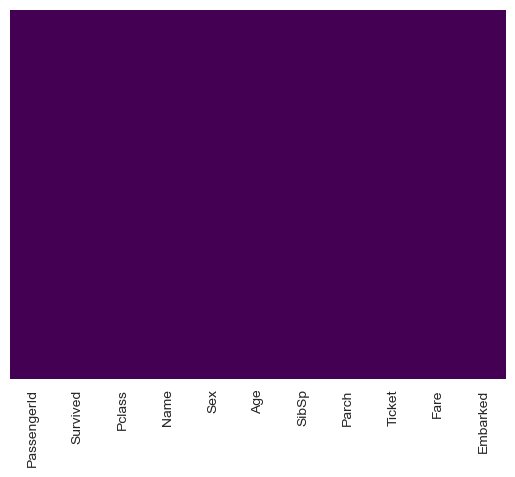

In [36]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap ='viridis')

### get dummy values for categorical data like age and city

In [43]:
df_train['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [52]:
sex = pd.get_dummies(df_train['Sex'], drop_first=True, dtype=int)


In [53]:
embarked = pd.get_dummies(df_train['Embarked'], dtype=int, drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [55]:
train_df = pd.concat([df_train, sex, embarked] , axis=1)

In [56]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [57]:
train_df.drop(['PassengerId', 'Name', 'Sex', 'Ticket'], axis=1, inplace = True)

In [58]:
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,1,0,1
887,1,1,19.0,0,0,30.0000,S,0,0,1
888,0,3,25.0,1,2,23.4500,S,0,0,1
889,1,1,26.0,0,0,30.0000,C,1,0,0


In [64]:
pclasses = pd.get_dummies(df_train['Pclass'],  dtype=int)

In [66]:
pd.concat([df_train, pclasses], axis=1,)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [68]:
train_df.drop(['Pclass'], axis=1, inplace=True)

In [69]:
train_df

,Survived,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,22.0,1,0,7.2500,S,1,0,1
1,1,38.0,1,0,71.2833,C,0,0,0
2,1,26.0,0,0,7.9250,S,0,0,1
3,1,35.0,1,0,53.1000,S,0,0,1
4,0,35.0,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,S,1,0,1
887,1,19.0,0,0,30.0000,S,0,0,1
888,0,25.0,1,2,23.4500,S,0,0,1
889,1,26.0,0,0,30.0000,C,1,0,0
